# Kitaev Toy Model

\begin{equation}
  H_1 = \frac{i}{2}\sum_n^{N-1} \Big[(t+\Delta) a_{2n}a_{2n+1} + (-t+\Delta)a_{2n-1}a_{2n+2}\Big] - \frac{i}{2}\sum_n^N \mu a_{2n}a_{2n-1}
\end{equation}

Non-trivial case is achieved using $t = |\Delta |$ e $\mu = 0$

\begin{align}
  &H_1 = it \sum_n^{N-1}  a_{2n}a_{2n+1}
\end{align}

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# fill the hamiltonian matrix based on majorana operators

def generate_kitaev(Nsites, t, Delta, mu):
  Nmajo = 2*Nsites  # majoranas
  H = np.zeros([Nmajo, Nmajo])  # create empty matrix to be filled

  Jx = (t + Delta)*0.5  # coupling coefficient 
  Jy = (-t + Delta)*0.5
  
  for n in range(1, Nsites):
    H[(2*n)-1, (2*n+1)-1] = Jx
    H[(2*n-1)-1, (2*n+2)-1] = Jy

    H[(2*n+1)-1, (2*n)-1] = -Jx
    H[(2*n+2)-1, (2*n-1)-1] = -Jy

    H[(2*n)-1, (2*n-1)-1] = mu*0.5
    H[(2*n-1)-1, (2*n)-1] = -mu*0.5

  H[(2*Nsites)-1, (2*Nsites - 1)-1] = mu*0.5
  H[(2*Nsites-1)-1, (2*Nsites)-1] = -mu*0.5
  H = 1j*H  # hamiltonian is strictly imaginary

  return Nmajo, H

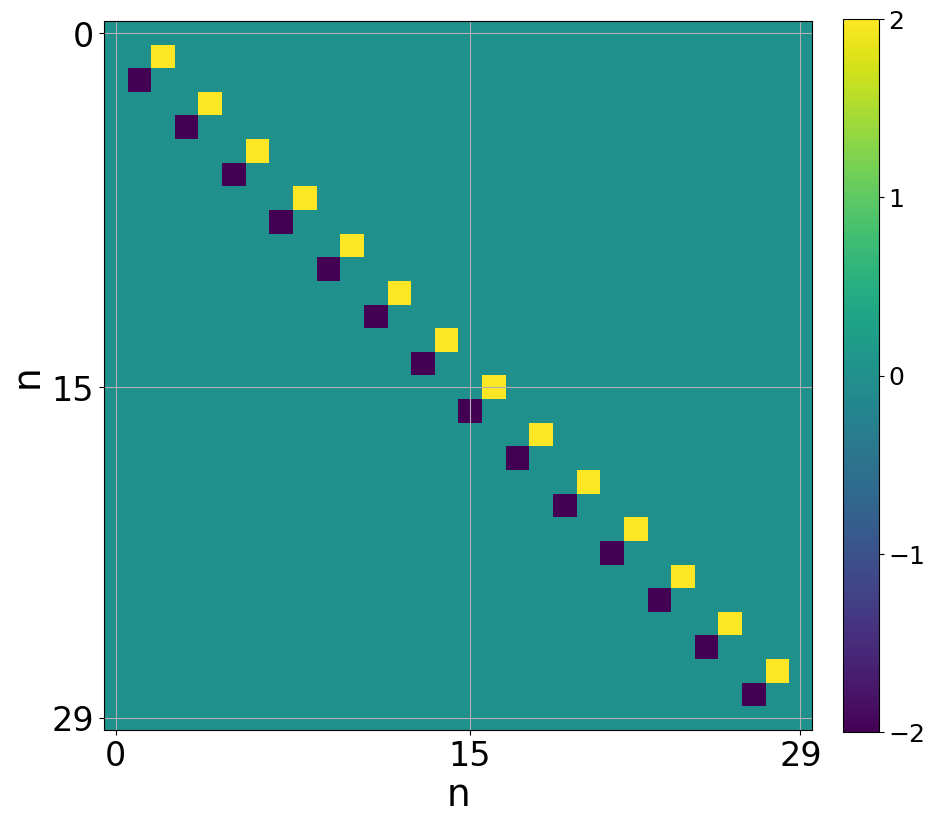

In [ ]:
# Parameters
t = 2       # Hopping
Delta = 2   # Superconductivity
mu = 0      # Onsite energy (chemical potential)
Nsites = 15 # Number of sites
#=================================================#

# Visualizing the Hamiltonian
majoranas, H1 = generate_kitaev(Nsites, t, Delta, mu)

plt.style.use('default')
fig, ax = plt.subplots(figsize = (10,10))
# ax.set_title('Hamiltoniana de Kitaev', size = '27')
ax.set_xlabel('n',  size = '27')
ax.set_ylabel('n',  size = '27')

ticks = [0,Nsites, 2*Nsites-1]
ax.set_xticks(ticks)
ax.set_yticks(ticks)

ax.set_xticklabels([0,Nsites, 2*Nsites-1], fontsize = '24')
ax.set_yticklabels([0,Nsites, 2*Nsites-1], fontsize = '24')

im = plt.imshow(H1.imag)
plt.colorbar(ticks=range(-2,3), fraction=0.046, pad=0.04)
im.figure.axes[1].tick_params(labelsize=18)

plt.grid()
plt.show()

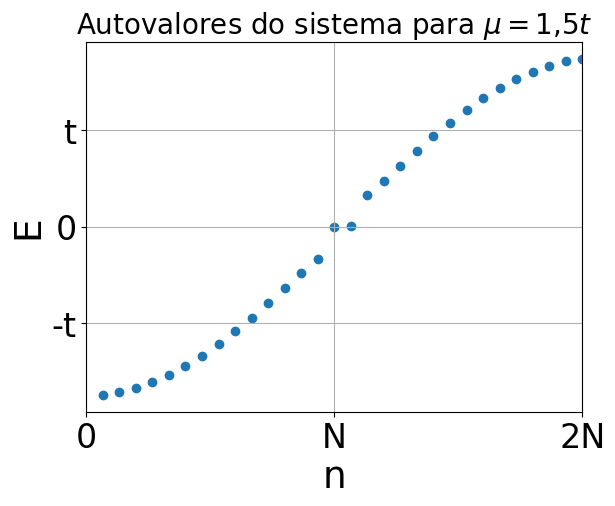

In [ ]:
# Parameters
t = 1.0       # Hopping
Delta = 1.0   # Superconductivity
mu = 1.5*t      # Onsite energy (chemical potencial)
Nsites = 15 # Number of sites
#=================================================#

majoranas, H1 = generate_kitaev(Nsites, t, Delta, mu)

evals, evecs = np.linalg.eigh(H1) # get eigenthings

# get eigenvalues < 0 & > 0
evals_up = -np.sort(-np.array([evals[i] for i in range(len(evals)) if evals[i] > 1e-2])).copy()
evals_down = np.array([evals[i] for i in range(len(evals)) if evals[i] < -1e-2]).copy()

evals2 = np.array([evals_up, evals_down])

############## GRAPHING ##############
plt.style.use('default')
fig2, ax = plt.subplots()
ax.scatter(np.arange(majoranas)+1, evals)
ax.set_title('Autovalores do sistema para $\mu = $1,5$t$', size = '20')
ax.set_xlabel('n', size = '27')
ax.set_ylabel('E', size = '27')

ax.set_yticks([-t,0, t])
ax.set_yticklabels(['-t', '0', 't'], size=24)

ax.set_xticks([0, Nsites, 2*Nsites])
ax.set_xticklabels(['0', 'N', '2N'], size=24)
ax.set_xlim(0,2*Nsites)
ax.grid()
plt.show()

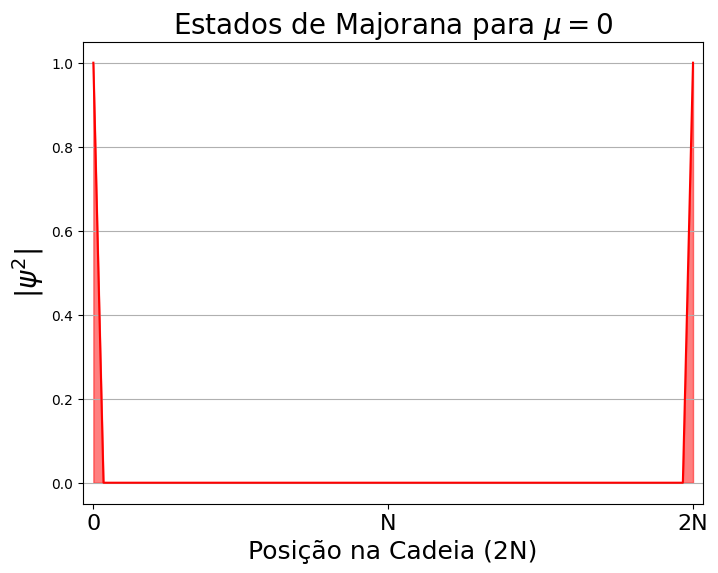

In [ ]:
############## UNCOUPLED STATES ########################

#===== PARAMETERS =====#
Nsites = 30
t = Delta = 1.0
mu = 0.0
#=================================================#

majoranas, H1 = generate_kitaev(Nsites, t, Delta, mu)
evals, evecs = np.linalg.eigh(H1)

#====== FIND EIGENVAL = 0 =========#
maj_index = np.where(abs(evals) <= 1e-10)[0]

majModes = np.abs(evecs[:, maj_index[0]])**2 + np.abs(evecs[:, maj_index[-1]])**2
# print(majModes)

#====== FIND TRIVIAL EIGENVALUES =========#
triv_index = np.where(abs(evals) >= 1e-10)[0]
trivModes = np.abs(evecs[:, triv_index[0]])**2 + np.abs(evecs[:, triv_index[-1]])**2

################## GRAPH ###################
fig4, ax = plt.subplots(figsize = (8, 6))
ax.plot(np.arange(majoranas)+1, majModes, color='red')
ax.fill_between(np.arange(majoranas)+1, majModes, color='red', alpha = 0.5)


# axs.plot(np.arange(majoranas)+1, trivModes, color='red')
# axs.plot(np.arange(majoranas)+1, np.abs(evecs[:, 6]**2), color='m')
# axs.plot(np.arange(majoranas)+1, np.abs(evecs[:, 8]**2), color='m')
# axs.plot(np.arange(majoranas)+1, np.abs(evecs[:, 7]**2), color='b')
# axs.plot(np.arange(majoranas)+1, np.abs(evecs[:, 9]**2), color='b')


plt.xlim(0,2*Nsites+1)
ax.set_xticks([1, Nsites, 2*Nsites])
ax.set_xticklabels(['0', 'N', '2N'], fontsize=16)

# plt.tick_params(left = False, labelleft = False) # labels along the left edge are off

plt.grid(axis='y')
plt.title('Estados de Majorana para $\mu = 0$', size = '20')
plt.xlabel('Posição na Cadeia (2N)', size = '18')
plt.ylabel('$|\psi^2|$', size = '20')

plt.show()

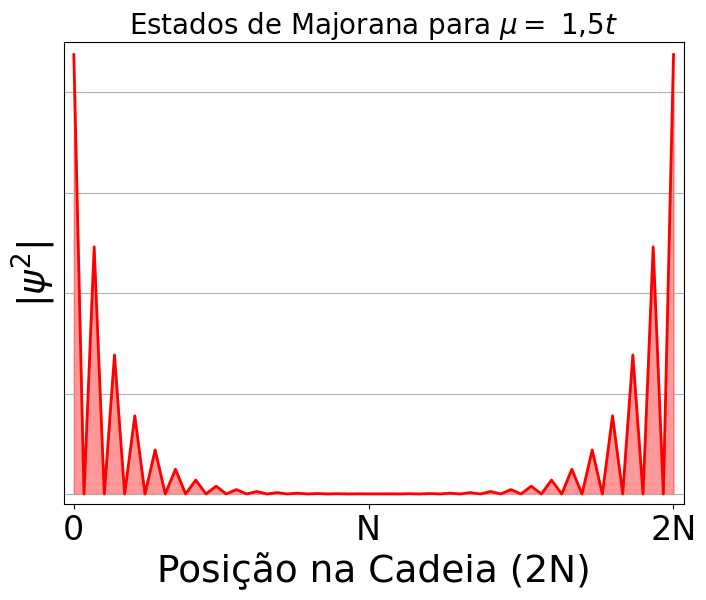

In [ ]:
############## UNCOUPLED STATES LIMIT CASE ########################

#===== PARAMETERS =====#
Nsites = 30
t = Delta = 1.0
mu = 1.5*t
#=================================================#

majoranas, H1 = generate_kitaev(Nsites, t, Delta, mu)
evals, evecs = np.linalg.eigh(H1)
# print(evals)

#====== FIND EIGENVALUES =========#
maj_index = np.where(np.abs(evals) <= 1e-4)[0]
majModes = 0
for i in range(len(maj_index)):
  majModes += np.abs(evecs[:, maj_index[i]])**2


triv_index = np.where(np.abs(evals) > 1e-4)[0]
trivModes = 0
for i in range(len(triv_index)): 
  trivModes += np.abs(evecs[:, triv_index[i]])**2



################## GRAPH ###################
fig4, ax= plt.subplots(figsize = (8, 6))
ax.plot(np.arange(majoranas)+1, majModes, color='red', lw = 2)
ax.fill_between(np.arange(majoranas)+1, majModes, color='red', alpha=0.4)
# axs.plot(np.arange(majoranas)+1, trivModes, color='blue')

plt.title('Estados de Majorana para $\mu =$ 1,5$t$', size = '20')
plt.xlabel('Posição na Cadeia (2N)', size = '27')
plt.ylabel('$|\psi^2|$', size = '27')


plt.xlim(0,2*Nsites+1)
plt.ylim(-0.01,0.45)
ax.set_xticks([1, Nsites, 2*Nsites])
ax.set_xticklabels(['0', 'N', '2N'], fontsize=24)

plt.tick_params(left = False, labelleft = False) # labels along the left edge are off

plt.grid(axis='y')

plt.show()

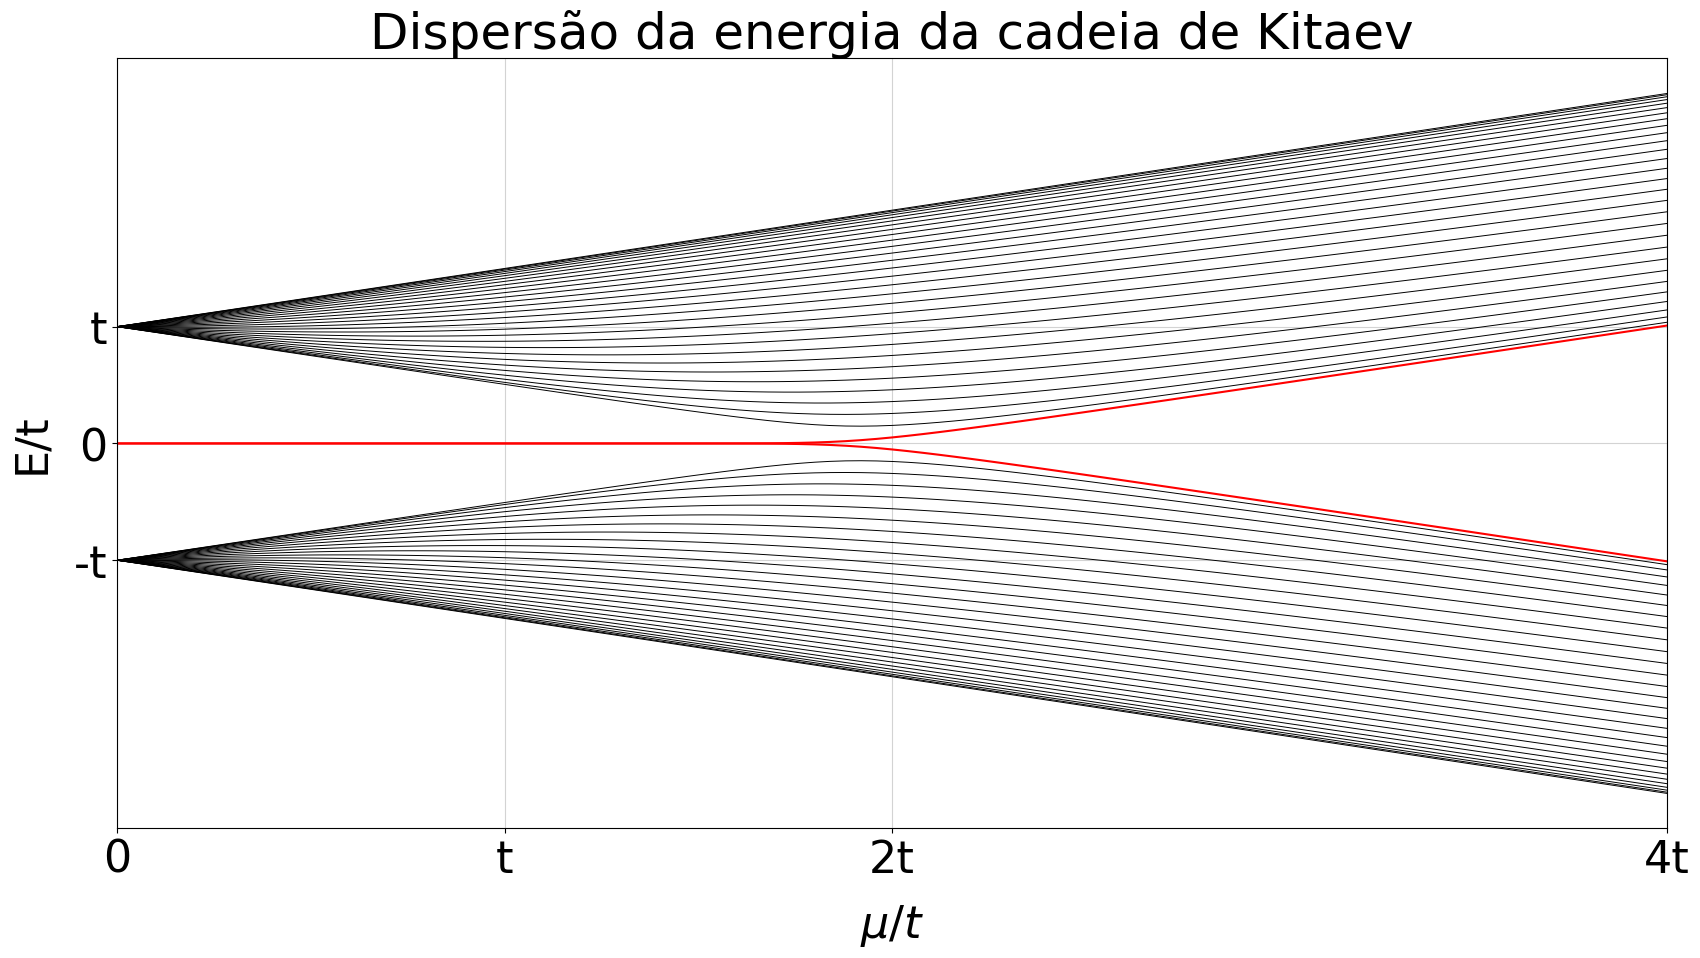

In [ ]:
############## ENERGY DISPERTION RELATION ############# 

#===== PARAMETERS =====#
t = 1.0
Delta = 1.0
sites = 30
var_mu = np.linspace(1e-10, 4*t, 101)
#=================================================#

# Creat matrix to store energies
Energies = np.zeros([len(var_mu), sites*2])

# calculate H and store eigenvalues
for i in range(len(var_mu)):
  majoranas, H = generate_kitaev(sites, t, Delta, var_mu[i])
  Energies[i], evecs = np.linalg.eigh(H)

# print(Energies)

################## GRAPH ###################
plt.style.use('default')
fig7, ax = plt.subplots(figsize = (20, 10))
for i in range(majoranas):
  # ax.plot(var_mu, Energies[:, i], color = 'black', linewidth = '0.7')
  
  if abs(Energies[i, i]) <= 1e-2: 
    ax.plot(var_mu/t, Energies[:, i]/t, color = 'red', linewidth = '1.5')
  else:
    ax.plot(var_mu/t, Energies[:, i]/t, color = 'black', linewidth = '0.7')

ax.grid(True, c = 'lightgray')

ax.set_yticks([-t,0,t])
ax.set_yticklabels(['-t',0, 't'], fontsize = 32)

ax.set_xlim(0, 4*t)
ax.set_xticks([0, t, 2*t, 4*t])
ax.set_xticklabels(['0', 't', '2t', '4t'], fontsize = 32)


ax.set_title('Dispersão da energia da cadeia de Kitaev', fontsize = 36)
ax.set_ylabel('E/t', fontsize = 32, labelpad = 15)
ax.set_xlabel('$\mu/t$', fontsize = 32, labelpad = 15)


################# textbox #######################
# props = dict(boxstyle='square', facecolor='white', alpha=0.5)
# textstr = '\n'.join((r'$t = %.1f$' % (t, ),
#                       r'$|\Delta| = %.1f$' % (Delta, )))

# ax.text(0.14, 0.95, 
#         textstr, 
#         transform=ax.transAxes, 
#         fontsize=14,
#         verticalalignment='top',
#         bbox=props)
##########################
plt.show()

# Bogoliubov formalism & Reciprocal space

The Kitaev Chain is given in terms of the sites $|n\rangle$ in the real space

\begin{equation}
  H_{BdG} = -\sum_n \mu \tau_z |n\rangle \langle n|
      -\sum_n \Big[
            (t\tau_z + i\Delta\tau_y)
            |n\rangle \langle n + 1|
            +H.C.
        \Big]
\end{equation}

We consider an infinite Kitaev chain by connecting the edges so that we have a ring. Given that electron distribution in the chain is uniform, it is convenient to rewrite it using Bloch's Theorem

\begin{equation}
  |k\rangle = N^{-1/2}\sum_j e^{-ikn} |n\rangle
\end{equation}

Thus, the BdG transformation gives

\begin{equation}
  H(k) = \langle k | H_{BdG}| k\rangle
  = (-2t\cos k - \mu)\tau_z + 2\Delta \sin^2 k\: \tau_y
\end{equation}

And for the whole chain (ring), simply add every site

\begin{equation}
  H_{BdG} = \sum_k H(k) |k\rangle \langle k|
\end{equation}

This hamiltonian simplyfies the problem because we describe the chain with a smaller hamiltonian thanks to particle-hole symmetry. Plus, we can have a look on the behavior of the energy in reciprocal space.

\begin{equation}
  E(k) = \pm \sqrt{(2t\cos k + \mu)^2 + 4\Delta ^2 \sin^2 k )}
\end{equation}


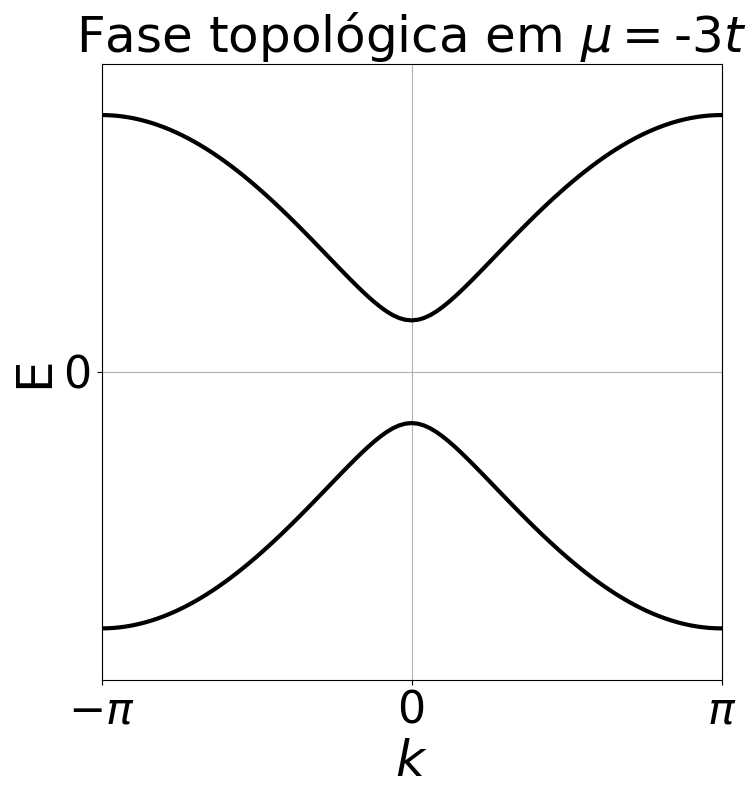

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
t = 1.0       # hopping
delta = 1.0   # superconductor coupling
mu = -3*t     # onsite energy (chemical potential)
k = np.linspace(-np.pi, np.pi, 101)

E = np.empty([len(k)])
for i in range(len(k)):
  E[i] = np.sqrt((2 * t * np.cos(k[i]) + mu)**2 + (4*delta**2 * np.sin(k[i])**2))
Esym = -E

############### GRAPHING ###############
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(k, E, c = 'black', lw = 3)
ax.plot(k, Esym, c = 'black', lw = 3)

ax.set_xlim(-np.pi, np.pi)


ax.set_title("Fase topológica em $\mu = $-3$t$", size = 36)
ax.set_ylabel("E", size = 36)
ax.set_xlabel("$k$", size = 36)
ax.set_xticks([-np.pi, 0, np.pi])
ax.set_xticklabels(["$-\pi$", "0", "$\pi$"], size = 32)

ax.set_ylim(-6*t,6*t)
ax.set_yticks([0])
ax.set_yticklabels([0], size = 32)
ax.grid('y')

# textbox ######################################
# props = dict(boxstyle='square', facecolor='white', alpha=0.8)
# textstr = r'$\mu = 0.0$'

# ax.text(0.15, 0.95, 
#         textstr, 
#         transform=ax.transAxes, 
#         fontsize=18,
#         verticalalignment='top',
#         bbox=props)
##########################